In [12]:
# start with 1600 objects with labels from Brewer et al 2016
# the relevant information is in Table 8

from astropy.table import Table
import pandas as pd

brewer2016_table8 = Table.read('./data/literature_tables/brewer2016_table8.fits', 
                               format='fits').to_pandas()
brewer2016_table9 = Table.read('./data/literature_tables/brewer2016_table9.fits', 
                               format='fits').to_pandas()
brewer2016_table8['Name'] = brewer2016_table8['Name'].str.decode('utf-8') 
brewer2016_table9['Name'] = brewer2016_table9['Name'].str.decode('utf-8') 

spocs_label_df = pd.merge(
    brewer2016_table8, 
    brewer2016_table9[['Name','[Fe/H]']], 
    on='Name')
spocs_label_df

,SPOCS,Name,Teff,logg,[M/H],S,logRhk,Vbr,Vsini,Vmac,Vrad,SNR,Crms,Lrms,N,[Fe/H]
0,2,HD 105,6033,4.53,0.04,0.38,-4.35,17.8,14.6,4.9,10.2,247,0.02,0.01,2,0.10
1,4,HD 166,5489,4.51,0.07,0.42,-4.40,5.0,4.1,2.6,-7.2,357,0.01,0.01,1,0.12
2,6,HD 377,5895,4.46,0.12,0.38,-4.37,17.5,14.6,4.1,0.9,248,0.01,0.02,1,0.19
3,10,HD 691,5489,4.48,0.18,0.56,-4.25,6.4,5.6,2.6,-3.2,258,0.01,0.02,1,0.24
4,12,HD 1388,5924,4.32,0.02,0.16,-4.97,4.9,2.3,4.2,29.2,250,0.01,0.01,2,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,3243,HIP 117946,4790,4.52,-0.04,0.85,-4.40,2.5,1.7,1.6,-12.6,202,0.01,0.02,2,0.04
1611,3244,HD 224619,5453,4.49,-0.16,0.16,-5.01,3.1,1.6,2.5,21.3,309,0.01,0.01,3,-0.17
1612,3245,WASP-8,5589,4.47,0.24,0.23,0.00,3.6,2.1,2.8,-2.2,255,0.01,0.01,1,0.26
1613,3246,HD 224679,5677,3.70,0.06,0.28,-4.60,10.1,8.3,4.2,-17.9,244,0.01,0.01,1,0.12


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0.5, 0, 'vbroad (km/s)')

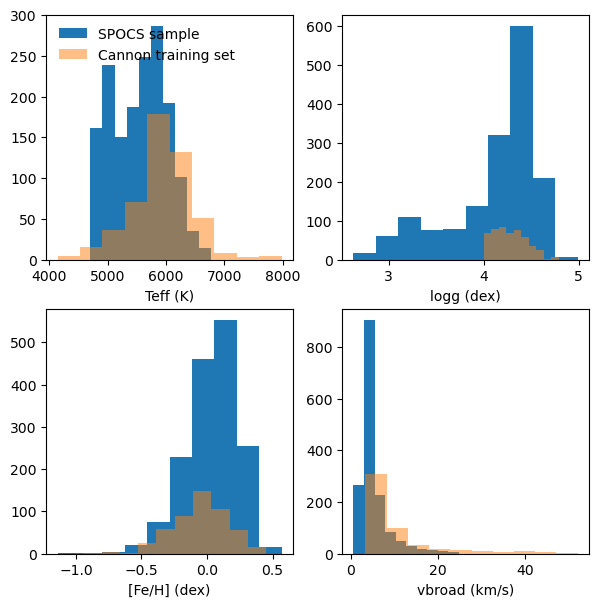

In [13]:
# first I should look at the training set distributions
%pylab inline
training_label_df = pd.read_csv('../gaia_binaries/data/galah_label_dataframes/training_labels.csv')


figure(figsize=(7,7))
subplot(221)
hist(spocs_label_df['Teff'], label='SPOCS sample')
hist(training_label_df.galah_teff, alpha=0.5, label='Cannon training set')
xlabel('Teff (K)');legend(loc='upper left', frameon=False, fontsize=10)

subplot(222)
hist(spocs_label_df['logg'])
hist(training_label_df.galah_logg, alpha=0.5)
xlabel('logg (dex)')

subplot(223)
hist(spocs_label_df['[Fe/H]'])
hist(training_label_df.galah_feh, alpha=0.5)
xlabel('[Fe/H] (dex)')

subplot(224)
hist(spocs_label_df['Vbr'])
hist(training_label_df.galah_vbroad, alpha=0.5)
xlabel('vbroad (km/s)')

In [3]:
# okay so I need to remove logg < 4
# and vbroad < minimum
# same as the CKS sample! this shouldn't be too difficult.
# then I'll be done for the day.

# I need to query gaia for all of these.

In [15]:
# removed targets with names like HTRXXX-XXX
# removed EPIC names (some didn't work, but I wanted to be efficient)
# removed targets with name like HATSXXX-XXX
# removing KOI-284 E/W since I can't tell which is which and they don't have RVS spectra
# renamed Kepler-21 A to Kepler-21 (Gaia only found 1 match)
# same for Kepler-68 A
# removed WASP-234318 since it didn't work
# then a couple others didn't show up in the crossmatch
# I'm not interested in being too carfeful about this.
for i in spocs_label_df['Name']:
    if 'HTR' in i or 'HATS' in i or 'EPIC' in i:
        pass
    elif 'KIC-' in i:
        print(i.replace('-', ' '))
    else:
        print(i)

HD 105        
HD 166        
HD 377        
HD 691        
HD 1388       
HD 1461       
HD 2589       
HD 3795       
HD 3861       
HD 4208       
HD 4203       
HD 4307       
HD 4628       
HD 4614       
HD 4747       
HD 4915       
HD 5133       
HD 6558       
HD 6872 B     
HD 6963       
HIP 5938      
HD 8038       
HIP 6276      
HD 7924       
HD 8574       
HD 8765       
HD 8907       
HD 9540       
HD 9472       
HD 9562       
HD 9407       
HD 9986       
HD 10145      
HD 10476      
HD 10700      
HD 10697      
HD 10780      
HD 11850      
HD 11964 A    
HD 12051      
HD 12235      
HD 12661      
HD 12846      
HD 13043      
HD 13357      
HD 13579      
HD 13931      
HD 14412      
HD 15335      
HD 16141      
HD 16287      
HD 16275      
HD 16397      
HD 16623      
HD 16895      
HD 17190      
HD 18143      
HD 18445      
HD 18632      
HD 18803      
HD 19034      
HD 19467      
HD 19308      
HD 19373      
HD 19994      
HD 20165      
HD 20619  

In [19]:
flux_df = pd.read_csv('../gaia_cannon_model/data/spocs_flux.csv')
sigma_df = pd.read_csv('../gaia_cannon_model/data/spocs_sigma.csv')
label_df = pd.read_csv('../gaia_cannon_model/data/spocs_labels.csv')

In [21]:
for source_id in label_df.source_id.to_numpy():
    print(source_id)

2477891500647336704
8479094371605632
3208926854625048064
2898239468873596800
2899947933845777920
3113909602378333056
3101382419728401408
582221750852254080
746545172372256384
3641697998570813952
6224299285781594624
4345775217221821312
2041085973668754176
2029433521248546304
6463782435948431616
2119828460957942528
2117369540643692544
2119736892255743744
2119655803272920448
2105135854577044480
2106822131756841600
2131620306552653312
2106720152052664448
2106390642162257536
2132051933586262784
2106497157350919296
2100064189696084864
2132082999087248384
2131133261560058496
2131060521993182976
2100418850915010432
2101479879638683392
2101041513795585024
2127832695152371584
2139300262131379584
2052875933772027904
2126992363331351296
2127619222398354304
2129724237409548288
2125713940547834496
2051866238502437632
2128409045404259328
2077773790469159680
2052184512764630272
2128094451941001856
2080505900764913792
2079576611581927168
2076084974972891392
4955371367334610048
6963761190199424
65072435

In [23]:
flux_df.columns.to_numpy()

array(['Unnamed: 0', '2477891500647336704', '8479094371605632',
       '3208926854625048064', '2898239468873596800',
       '2899947933845777920', '3113909602378333056',
       '3101382419728401408', '582221750852254080', '746545172372256384',
       '3641697998570813952', '6224299285781594624',
       '4345775217221821312', '2041085973668754176',
       '2029433521248546304', '6463782435948431616',
       '2119828460957942528', '2117369540643692544',
       '2119736892255743744', '2119655803272920448',
       '2105135854577044480', '2106822131756841600',
       '2131620306552653312', '2106720152052664448',
       '2106390642162257536', '2132051933586262784',
       '2106497157350919296', '2100064189696084864',
       '2132082999087248384', '2131133261560058496',
       '2131060521993182976', '2100418850915010432',
       '2101479879638683392', '2101041513795585024',
       '2127832695152371584', '2139300262131379584',
       '2052875933772027904', '2126992363331351296',
       '212761

In [18]:
# this is running, but is it working?
# it's taking a while.
# but there are a lot of spocs singles
# I think this is fine.